**Objective** - To explore this dataset, analyze patterns in user behavior, extract meaningful insights, and visualize the findings.

In [1]:
#Instructions to run this Notebook
#Please upload the dataset `py_demo_client_extension_30_20250221075805.csv` when prompted below.
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv('py_demo_client_extension_30_20250221075805.csv')


Saving py_demo_client_extension_30_20250221075805.csv to py_demo_client_extension_30_20250221075805.csv


In [2]:
#importing important libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import datetime as dt
import pandas as pd


In [ ]:
#importing dataset to work on
df = pd.read_csv('/content/drive/MyDrive/py_demo_client_extension_30_20250221075805.csv')

In [3]:
#cleaning the dataset
df = df.iloc[4:].reset_index(drop=True)
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)

In [4]:
#converting eventimeutc to datetime format for easy extraction of date, day of week and hour of day
df['eventtimeutc'] = pd.to_datetime(df['eventtimeutc'])
df['date'] = df['eventtimeutc'].dt.date
df['hour'] = df['eventtimeutc'].dt.hour
df['weekday'] = df['eventtimeutc'].dt.day_name()

In [ ]:
#setting inde as eventtimeutc as it is uniquley defining rows
df.set_index('eventtimeutc', inplace=True)
df.drop(columns='eventtime', inplace=True)

In [5]:
df.head()

,OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime,date,hour,weekday
0,py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,2025-02-21 07:58:02.688000+00:00,link,NaN,166328,0,2025-02-20T23:58:02-08:00,2025-02-21,7,Friday
1,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,2025-02-21 07:57:51.308000+00:00,link,Snapshot - Chrome Web Store,166327,166326,2025-02-20T23:57:51-08:00,2025-02-21,7,Friday
2,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21 07:57:40.972000+00:00,link,PY Insights | Product,166319,0,2025-02-20T23:57:40-08:00,2025-02-21,7,Friday
3,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21 07:57:40.988000+00:00,link,PY Insights | Product,166321,0,2025-02-20T23:57:40-08:00,2025-02-21,7,Friday
4,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product,2025-02-21 07:57:38.017000+00:00,link,PY Insights | Product,166318,0,2025-02-20T23:57:38-08:00,2025-02-21,7,Friday


3 main parameters of behavioral analysis we will analyse:    
When the user is most active (time-based)          
Where the user goes most (domain frequency)            
How the user navigates (transition types)

In [8]:
active_time = df.groupby(['weekday', 'hour']).size().unstack()

In [9]:
active_time

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,54.0,41.0,15.0,21.0,64.0,37.0,28.0,36.0,NaN,1.0,...,49.0,10.0,12.0,29.0,19.0,15.0,5.0,NaN,27.0,15.0
Monday,71.0,29.0,51.0,108.0,6.0,119.0,68.0,44.0,15.0,NaN,...,16.0,3.0,11.0,1.0,28.0,72.0,NaN,2.0,4.0,15.0
Saturday,40.0,9.0,31.0,2.0,38.0,3.0,NaN,2.0,NaN,NaN,...,NaN,13.0,65.0,24.0,24.0,5.0,15.0,55.0,6.0,9.0
Sunday,8.0,7.0,3.0,14.0,62.0,2.0,3.0,NaN,NaN,1.0,...,NaN,7.0,41.0,78.0,20.0,1.0,9.0,15.0,36.0,29.0
Thursday,NaN,4.0,15.0,5.0,31.0,133.0,178.0,73.0,22.0,NaN,...,NaN,18.0,13.0,20.0,87.0,117.0,28.0,1.0,15.0,27.0
Tuesday,5.0,4.0,8.0,33.0,38.0,53.0,34.0,39.0,51.0,9.0,...,32.0,96.0,20.0,37.0,5.0,3.0,2.0,4.0,4.0,44.0
Wednesday,46.0,48.0,33.0,33.0,227.0,153.0,21.0,81.0,88.0,12.0,...,2.0,12.0,62.0,94.0,117.0,74.0,11.0,125.0,168.0,13.0


In [ ]:
#analysing when user is most active
active_time = df.groupby(['weekday', 'hour']).size().unstack(fill_value=0)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
active_time = active_time.reindex(weekday_order)

In [ ]:
active_time

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Monday,71,29,51,108,6,119,68,44,15,0,...,16,3,11,1,28,72,0,2,4,15
Tuesday,5,4,8,33,38,53,34,39,51,9,...,32,96,20,37,5,3,2,4,4,44
Wednesday,46,48,33,33,227,153,21,81,88,12,...,2,12,62,94,117,74,11,125,168,13
Thursday,0,4,15,5,31,133,178,73,22,0,...,0,18,13,20,87,117,28,1,15,27
Friday,54,41,15,21,64,37,28,36,0,1,...,49,10,12,29,19,15,5,0,27,15
Saturday,40,9,31,2,38,3,0,2,0,0,...,0,13,65,24,24,5,15,55,6,9
Sunday,8,7,3,14,62,2,3,0,0,1,...,0,7,41,78,20,1,9,15,36,29


In [ ]:
#analysing what days of week and what hours of day user is most active
weekday_totals = df['weekday'].value_counts().reindex(weekday_order)
print(weekday_totals)
hour_totals = df['hour'].value_counts().sort_index()
print(hour_totals)

weekday
Monday        721
Tuesday       624
Wednesday    1509
Thursday      852
Friday        546
Saturday      348
Sunday        504
Name: count, dtype: int64
hour
0     224
1     142
2     156
3     216
4     466
5     500
6     332
7     275
8     176
9      23
10     51
11    225
12    173
13    109
14     99
15    159
16    224
17    283
18    300
19    287
20     70
21    202
22    260
23    152
Name: count, dtype: int64


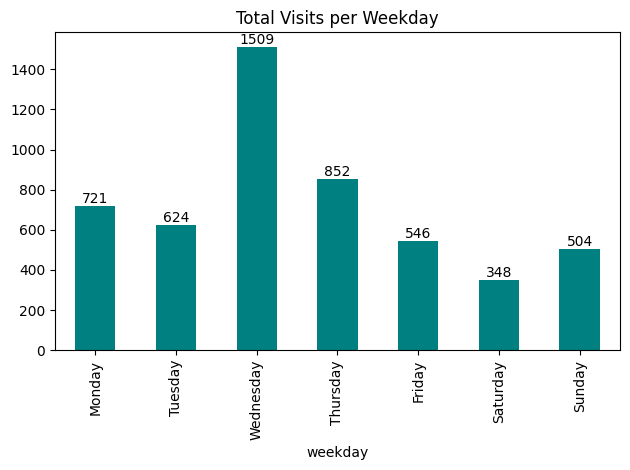

In [ ]:
weekday_plt = weekday_totals.plot(kind='bar', color='teal', title='Total Visits per Weekday')

for container in weekday_plt.containers:
    weekday_plt.bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

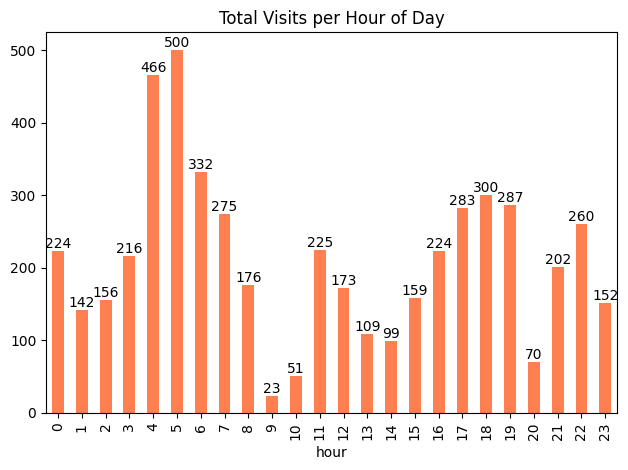

In [ ]:
hourly_plt = hour_totals.plot(kind='bar', color='coral', title='Total Visits per Hour of Day')
#adding data labels for better understanding
for container in hourly_plt.containers:
    hourly_plt.bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

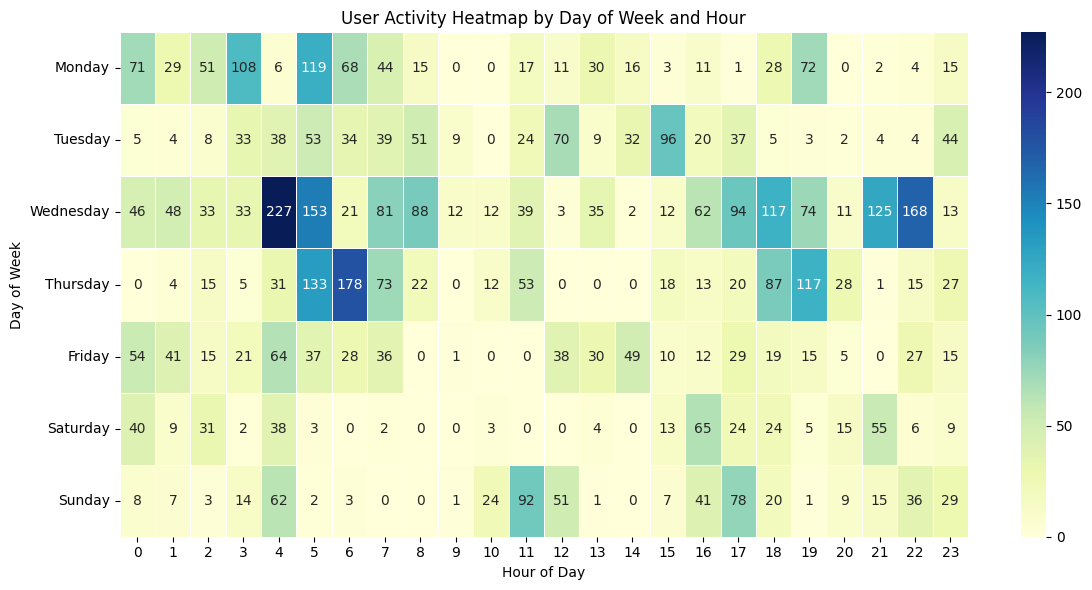

In [ ]:
#breaking down further for user activity
plt.figure(figsize=(12, 6))
sns.heatmap(active_time, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("User Activity Heatmap by Day of Week and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

A) Time based activity analysis                       
**Most active day** - Wednesday                 
**Most active hours** - Between 4 to 7 AM and 5 to 7 PM                     
**MOST ACTIVE DAY-HOURS -**
1) Wednesday 4-5 AM: 227 visits
2) Thursday 6-7 AM: 178 visits
3) Wednesday 10-11 PM: 168 visits
4) Wednesday 5-6 AM: 153 visits

In [ ]:
#Finding top 20 highly searched domains
from urllib.parse import urlparse
#func for extrating url
def extract_domain(url):
    parsed_url = urlparse(url)  # returns a ParseResult object
    domain = parsed_url.netloc  # get the network location (e.g. www.google.com)
    return domain

df['domain'] = df['url'].apply(extract_domain)

top_domains = df['domain'].value_counts().head(20)


B) MAX VISITED DOMAINS (where)

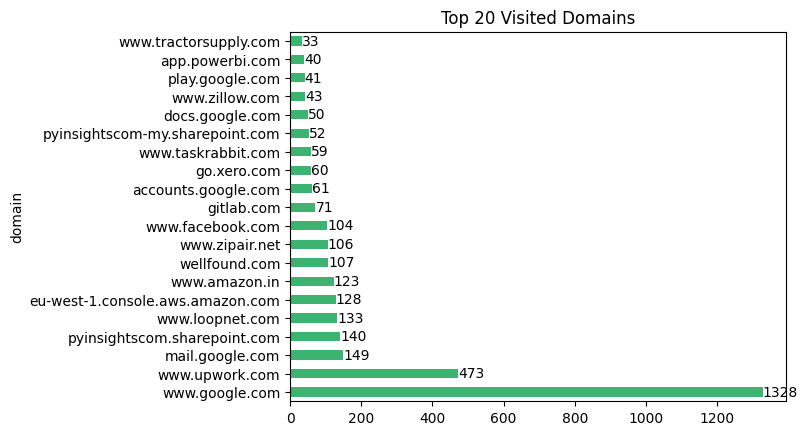

In [ ]:
domain_plt = top_domains.plot(kind='barh', color='mediumseagreen', title='Top 20 Visited Domains')
for container in domain_plt.containers:
    domain_plt.bar_label(container, fmt='%.0f')

KEY INSIGHTS - 1)THE USER IS VERY FREQUENT USER OF GOOGLE SERVICES (WEB, MAIL, PLAYSTORE, DOCS)  2)Likely freelance service provider (Upwork) and data analyst (PowerBi) and data researcher for project/work related (Pyinsights) 3)Likely in search of career growth opportunities (wellfound)  4) Shopping (amazon) which might be related to home furniture as we can see high real estate related searches as categorized in below charts (zillow, loopnet) 5)Planning for travel (zepair) on 29th JAN as shown below

In [ ]:
zipair_df = df[df['domain'] == 'www.zipair.net']

#visits by date
zipair_daily = zipair_df['date'].value_counts().sort_index()

print(zipair_daily)

date
2025-01-29    106
Name: count, dtype: int64


**Categorising Domains**

In [ ]:
#assigning key and value pairs for domain and category
domain = []
category = []

for i in top_domains.index:
  domain.append(i)
  if 'google' in i:
    category.append('Search Engine')
  elif 'upwork' in i:
    category.append('Freelancing')
  elif "taskrabbit" in i:
    category.append('services')
  elif "mail" in i:
    category.append('mail')
  elif "pyinsightscom" in i:
    category.append('Powr of you')
  elif "loopnet" in i:
    category.append('Real estate')
  elif 'zillow' in i:
    category.append('Real estate')
  elif "amazon" in i:
    category.append('shopping')
  elif "wellfound" in i:
    category.append('jobs')
  elif "zipair" in i:
    category.append('travel planning')
  elif "gitlab" in i:
    category.append('development')
  elif "go.xero" in i:
    category.append('accounting')
  elif 'powerbi' in i:
    category.append('analytics')
  elif 'tractor' in i:
    category.append('services')
  else:
    category.append('Uncategorized')

In [ ]:
#creating dictionary for domain and category pairs
domain_category_dict = dict(zip(domain, category))
domain_category_dict

{'www.google.com': 'Search Engine',
 'www.upwork.com': 'Freelancing',
 'mail.google.com': 'Search Engine',
 'pyinsightscom.sharepoint.com': 'Powr of you',
 'www.loopnet.com': 'Real estate',
 'eu-west-1.console.aws.amazon.com': 'shopping',
 'www.amazon.in': 'shopping',
 'wellfound.com': 'jobs',
 'www.zipair.net': 'travel planning',
 'www.facebook.com': 'Uncategorized',
 'gitlab.com': 'development',
 'accounts.google.com': 'Search Engine',
 'go.xero.com': 'accounting',
 'www.taskrabbit.com': 'services',
 'pyinsightscom-my.sharepoint.com': 'Powr of you',
 'docs.google.com': 'Search Engine',
 'www.zillow.com': 'Real estate',
 'play.google.com': 'Search Engine',
 'app.powerbi.com': 'analytics',
 'www.tractorsupply.com': 'services'}

In [ ]:
df['category'] = df['domain'].map(domain_category_dict).fillna('Other')

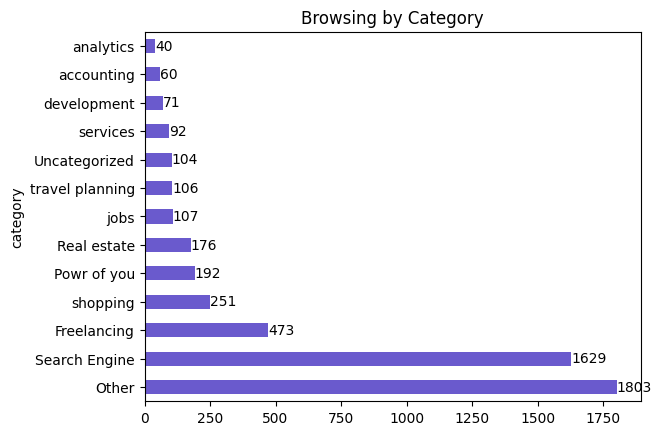

In [ ]:
category_count = df['category'].value_counts()
category_count_plt = category_count.plot(kind='barh', color='slateblue', title='Browsing by Category')
for container in category_count_plt.containers:
    category_count_plt.bar_label(container, fmt='%.0f')

C)Transition Type Analysis   (TYPED, RELOADED, clicking on hyperlinks)

In [ ]:
transition_counts

,count
transition,
link,4098
reload,321
generated,259
form_submit,204
auto_toplevel,113
typed,105
auto_bookmark,3
manual_subframe,1


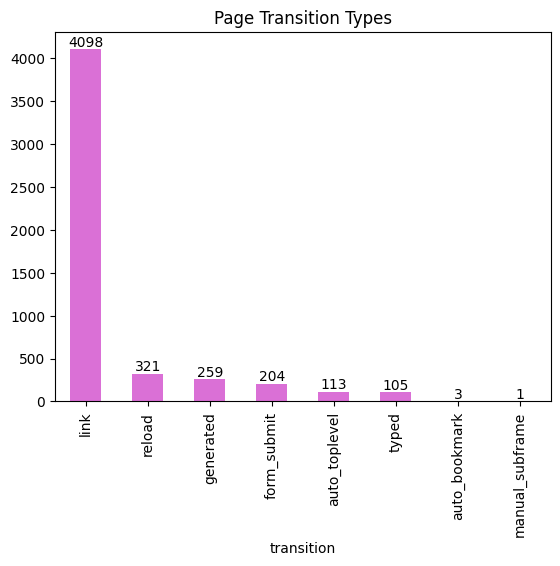

In [ ]:
transition_counts = df['transition'].value_counts()

transition_plt = transition_counts.plot(kind='bar', color='orchid', title='Page Transition Types')
for container in transition_plt.containers:
    transition_plt.bar_label(container, fmt='%.0f')
plt.show()

**Most of the searches are result of clicking on hyperlinks from one page taking to another.**

Understanding interaction pattern after first click

In [ ]:
visit_map = df.set_index('visitId')[['url', 'referringVisitId']]
visit_map

,url,referringVisitId
visitId,,
166328,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,0
166327,https://chromewebstore.google.com/detail/snaps...,166326
166319,https://py-insights.com/account/demo/product?s...,0
166321,https://py-insights.com/account/demo/product?s...,0
166318,https://py-insights.com/account/demo/product,0
...,...,...
160220,https://accounts.britishairways.com/security/c...,0
160213,https://accounts.britishairways.com/u/login?st...,160212
160211,https://www.avios.com/manage-avios/move-and-co...,0


In [ ]:
#mapping of visitId to URL
visit_map = df.set_index('visitId')[['url', 'referringVisitId']]

#merging each visit with its referrer
df_sessions = df.merge(
    df[['visitId', 'url']].rename(columns={'visitId': 'referringVisitId', 'url': 'referrer_url'}),
    how='left',
    on='referringVisitId')

In [ ]:
df_sessions

,OrgId,ParticipantId,DeviceId,url,transition,title,visitId,referringVisitId,date,hour,weekday,referrer_url
0,py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,link,NaN,166328,0,2025-02-21,7,Friday,NaN
1,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,link,Snapshot - Chrome Web Store,166327,166326,2025-02-21,7,Friday,NaN
2,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,link,PY Insights | Product,166319,0,2025-02-21,7,Friday,NaN
3,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,link,PY Insights | Product,166321,0,2025-02-21,7,Friday,NaN
4,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product,link,PY Insights | Product,166318,0,2025-02-21,7,Friday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5099,py_demo_client,demo,2nwjevbvxzm7ehb254,https://accounts.britishairways.com/security/c...,typed,Error,160220,0,2025-01-21,11,Tuesday,NaN
5100,py_demo_client,demo,2nwjevbvxzm7ehb254,https://accounts.britishairways.com/u/login?st...,link,British Airways log in,160213,160212,2025-01-21,11,Tuesday,NaN
5101,py_demo_client,demo,2nwjevbvxzm7ehb254,https://www.avios.com/manage-avios/move-and-co...,link,Convert Avios: Nectar &#44; Finnair Plus &#44...,160211,0,2025-01-21,11,Tuesday,NaN
5102,py_demo_client,demo,2nwjevbvxzm7ehb254,https://www.avios.com/manage-avios/move-and-co...,typed,Convert Avios: Nectar &#44; Finnair Plus &#44...,160209,0,2025-01-21,11,Tuesday,NaN


In [ ]:
click_count = df['referringVisitId'].value_counts()
click_count

,count
referringVisitId,
0,2940
164861,84
161142,44
160252,33
163168,32
...,...
164777,1
164774,1
164765,1


In [ ]:
#how many times a visitId was a referred
click_count = df['referringVisitId'].value_counts()

click_chain_df = df[df['visitId'].isin(click_count.index)]
#creating copy so we dont change original dataframe
click_chain_df = click_chain_df.copy()
#mapping visited id with corrspondng value in click_count
click_chain_df['clicks_after'] = click_chain_df['visitId'].map(click_count)

click_chain_df[['url', 'clicks_after']].sort_values(by='clicks_after', ascending=False).head(10)

,url,clicks_after
eventtimeutc,,
2025-02-17 07:27:14.625000+00:00,https://wellfound.com/login,84
2025-01-27 05:21:04.191000+00:00,https://www.upwork.com/nx/client/dashboard/?na...,44
2025-02-03 05:18:45.774000+00:00,https://www.upwork.com/ab/messages/rooms/room_...,32
2025-01-23 06:01:25.440000+00:00,https://www.upwork.com/ab/applicants/181383150...,16
2025-01-29 07:13:29.113000+00:00,https://www.upwork.com/ab/messages/rooms/room_...,14
2025-02-04 08:21:17.392000+00:00,https://www.upwork.com/ab/messages/rooms/room_...,12
2025-01-30 05:54:10.288000+00:00,https://www.upwork.com/ab/messages/rooms/room_...,12
2025-01-22 11:10:01.546000+00:00,https://gitlab.com/websites7814244/poy-website...,10
2025-02-03 11:47:11.908000+00:00,https://www.upwork.com/ab/messages/rooms/room_...,10
